In [ ]:
# This program attempts to optimize using the Efficient frontier

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get stock tickers 
assets = ['FB','AMZN','AAPL','NFLX','GOOG'] #FAANG
# Assign weights to stocks in the portfolio
weights = np.array([0.2,0.2,0.2,0.2,0.2])
# Get the portoflio starting date
stockStartDate = '2013-01-01'
# Get portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-12-31'

In [3]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [4]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.380503,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327978,13.880000,365.280823
...,...,...,...,...,...
2020-12-23,268.109985,3185.270020,130.960007,514.479980,1732.380005
2020-12-24,267.399994,3172.689941,131.970001,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,136.690002,519.119995,1776.089966


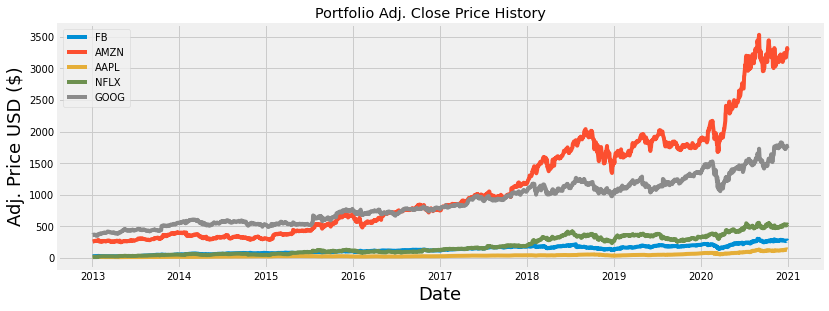

In [5]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()


In [6]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-12-23,0.003819,-0.006627,-0.006976,-0.024368,0.005152
2020-12-24,-0.002648,-0.003949,0.007712,-0.000991,0.003735
2020-12-28,0.035901,0.035071,0.035766,0.010020,0.021416


In [7]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118812,0.055133,0.044805,0.056671,0.050432
AMZN,0.055133,0.094175,0.039847,0.063399,0.047787
AAPL,0.044805,0.039847,0.081785,0.035053,0.038585
NFLX,0.056671,0.063399,0.035053,0.210828,0.048550
GOOG,0.050432,0.047787,0.038585,0.048550,0.065983


In [8]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06128419275711748

In [10]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24755644357826254

In [11]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.36035025978703833

In [12]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 36.0%
Annual volatility/standard deviation/risk : 25.0%
Annual variance : 6.0%


In [14]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.8MB/s 


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [18]:
# Portfolio Optimization 

# Calculate the expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)


In [19]:
mu

FB      0.329182
AMZN    0.375561
AAPL    0.293978
NFLX    0.586476
GOOG    0.217873
dtype: float64

In [20]:
S

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118812,0.055133,0.044805,0.056671,0.050432
AMZN,0.055133,0.094175,0.039847,0.063399,0.047787
AAPL,0.044805,0.039847,0.081785,0.035053,0.038585
NFLX,0.056671,0.063399,0.035053,0.210828,0.048550
GOOG,0.050432,0.047787,0.038585,0.048550,0.065983


In [21]:
#Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.06832), ('AMZN', 0.30886), ('AAPL', 0.28578), ('NFLX', 0.33703), ('GOOG', 0.0)])
Expected annual return: 42.0%
Annual volatility: 27.2%
Sharpe Ratio: 1.47


(0.4201630465494047, 0.271732610737866, 1.4726353434826873)

In [22]:
# Get the discrete allocation of each share per stock 

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weigths = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation', allocation) # No. of shares you can buy 
print('Funds remaining: ${:.2f}'.format(leftover)) # Amount of many leftover after purchase of shares

Discrete allocation {'FB': 4, 'AMZN': 1, 'AAPL': 33, 'NFLX': 10}
Funds remaining: $968.01
